## <center> Thera Bank - Campaign for selling personal loans </center>

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

### Models to be built:

1. KNN
2. Logistic Regression
3. Naive Bayes

### 1. Read the column description and ensure you understand each attribute well

In [1]:
import numpy as np
import pandas as pd

import statistics as stats

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Read the 'Bank_Personal_Loan_Modelling-1' csv file

In [2]:
cust_data_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
cust_data_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Variable Description:

- ID --> ID							
- Age --> Customer's age in completed years							
- Experience --> #years of professional experience							
- Income --> Annual income of the customer (000 in dollars)							
- ZIPCode --> Home Address ZIP code.							
- Family --> Family size of the customer							
- CCAvg	Avg. --> Spending on credit cards per month (000 in dollars)							
- Education --> Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
- Mortgage --> Value of house mortgage if any. (000 in dollars)							
- **Personal Loan -->	Did this customer accept the personal loan offered in the last campaign?** Our target variable
- Securities Account --> Does the customer have a securities account with the bank?							
- CD Account --> Does the customer have a certificate of deposit (CD) account with the bank?							
- Online --> Does the customer use internet banking facilities?							
- CreditCard --> Does the customer use a credit card issued by UniversalBank?							


#### Variable Analysis:

These variables can be grouped as follows:

1. Binary category variables:

> - Personal Loan <br>
> - Securities Account <br>
> - CD Account <br>
> - Online <br>
> - Credit Card <br>

2. Interval variables:

> - Age  <br>
> - Experience <br>
> - Income <br>
> - CCAvg <br>
> - Mortage <br>

3. Ordinal Categorical Variables:

> - Family <br>
> - Education <br>

4. Nominal variable:

> - ID <br>
> - Zip Code <br>

**Observation:** 

    The 'ID' column does not add any useful information. By mere common sense we know that there will be no association             between customer ID and Personal loan. So we can go ahead and drop the 'ID' column as it will not add any value to the         model

#### Dropping 'ID' column:

In [3]:
cust_data_df.drop(labels='ID', axis=1, inplace=True)
cust_data_df.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


#### Check the shape of dataset:

In [4]:
cust_data_df.shape

(5000, 13)

**Inference:** 

    Thera bank 'Bank_Personal_Loan_Modelling-1' data has 5000 rows and 13 columns

#### Check the info:

In [5]:
cust_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


**Inference:** 
        
        All columns are numeric, so no encoding is needed

#### Check how many people have accepted personal loan in earlier campaign:

In [6]:
cust_data_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

**Inference:** 
    
    As mentioned in the problem statement, only 480 customers accepted the personal loan that was offered to them in the           earlier campaign.

#### Check for missing values:

In [7]:
cust_data_df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Inference:** 

    No missing values, so we are good to proceed.

### 2. Study the data distribution in each attribute, share your findings

#### Using describe()

In [8]:
cust_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


#### Using pair plot:

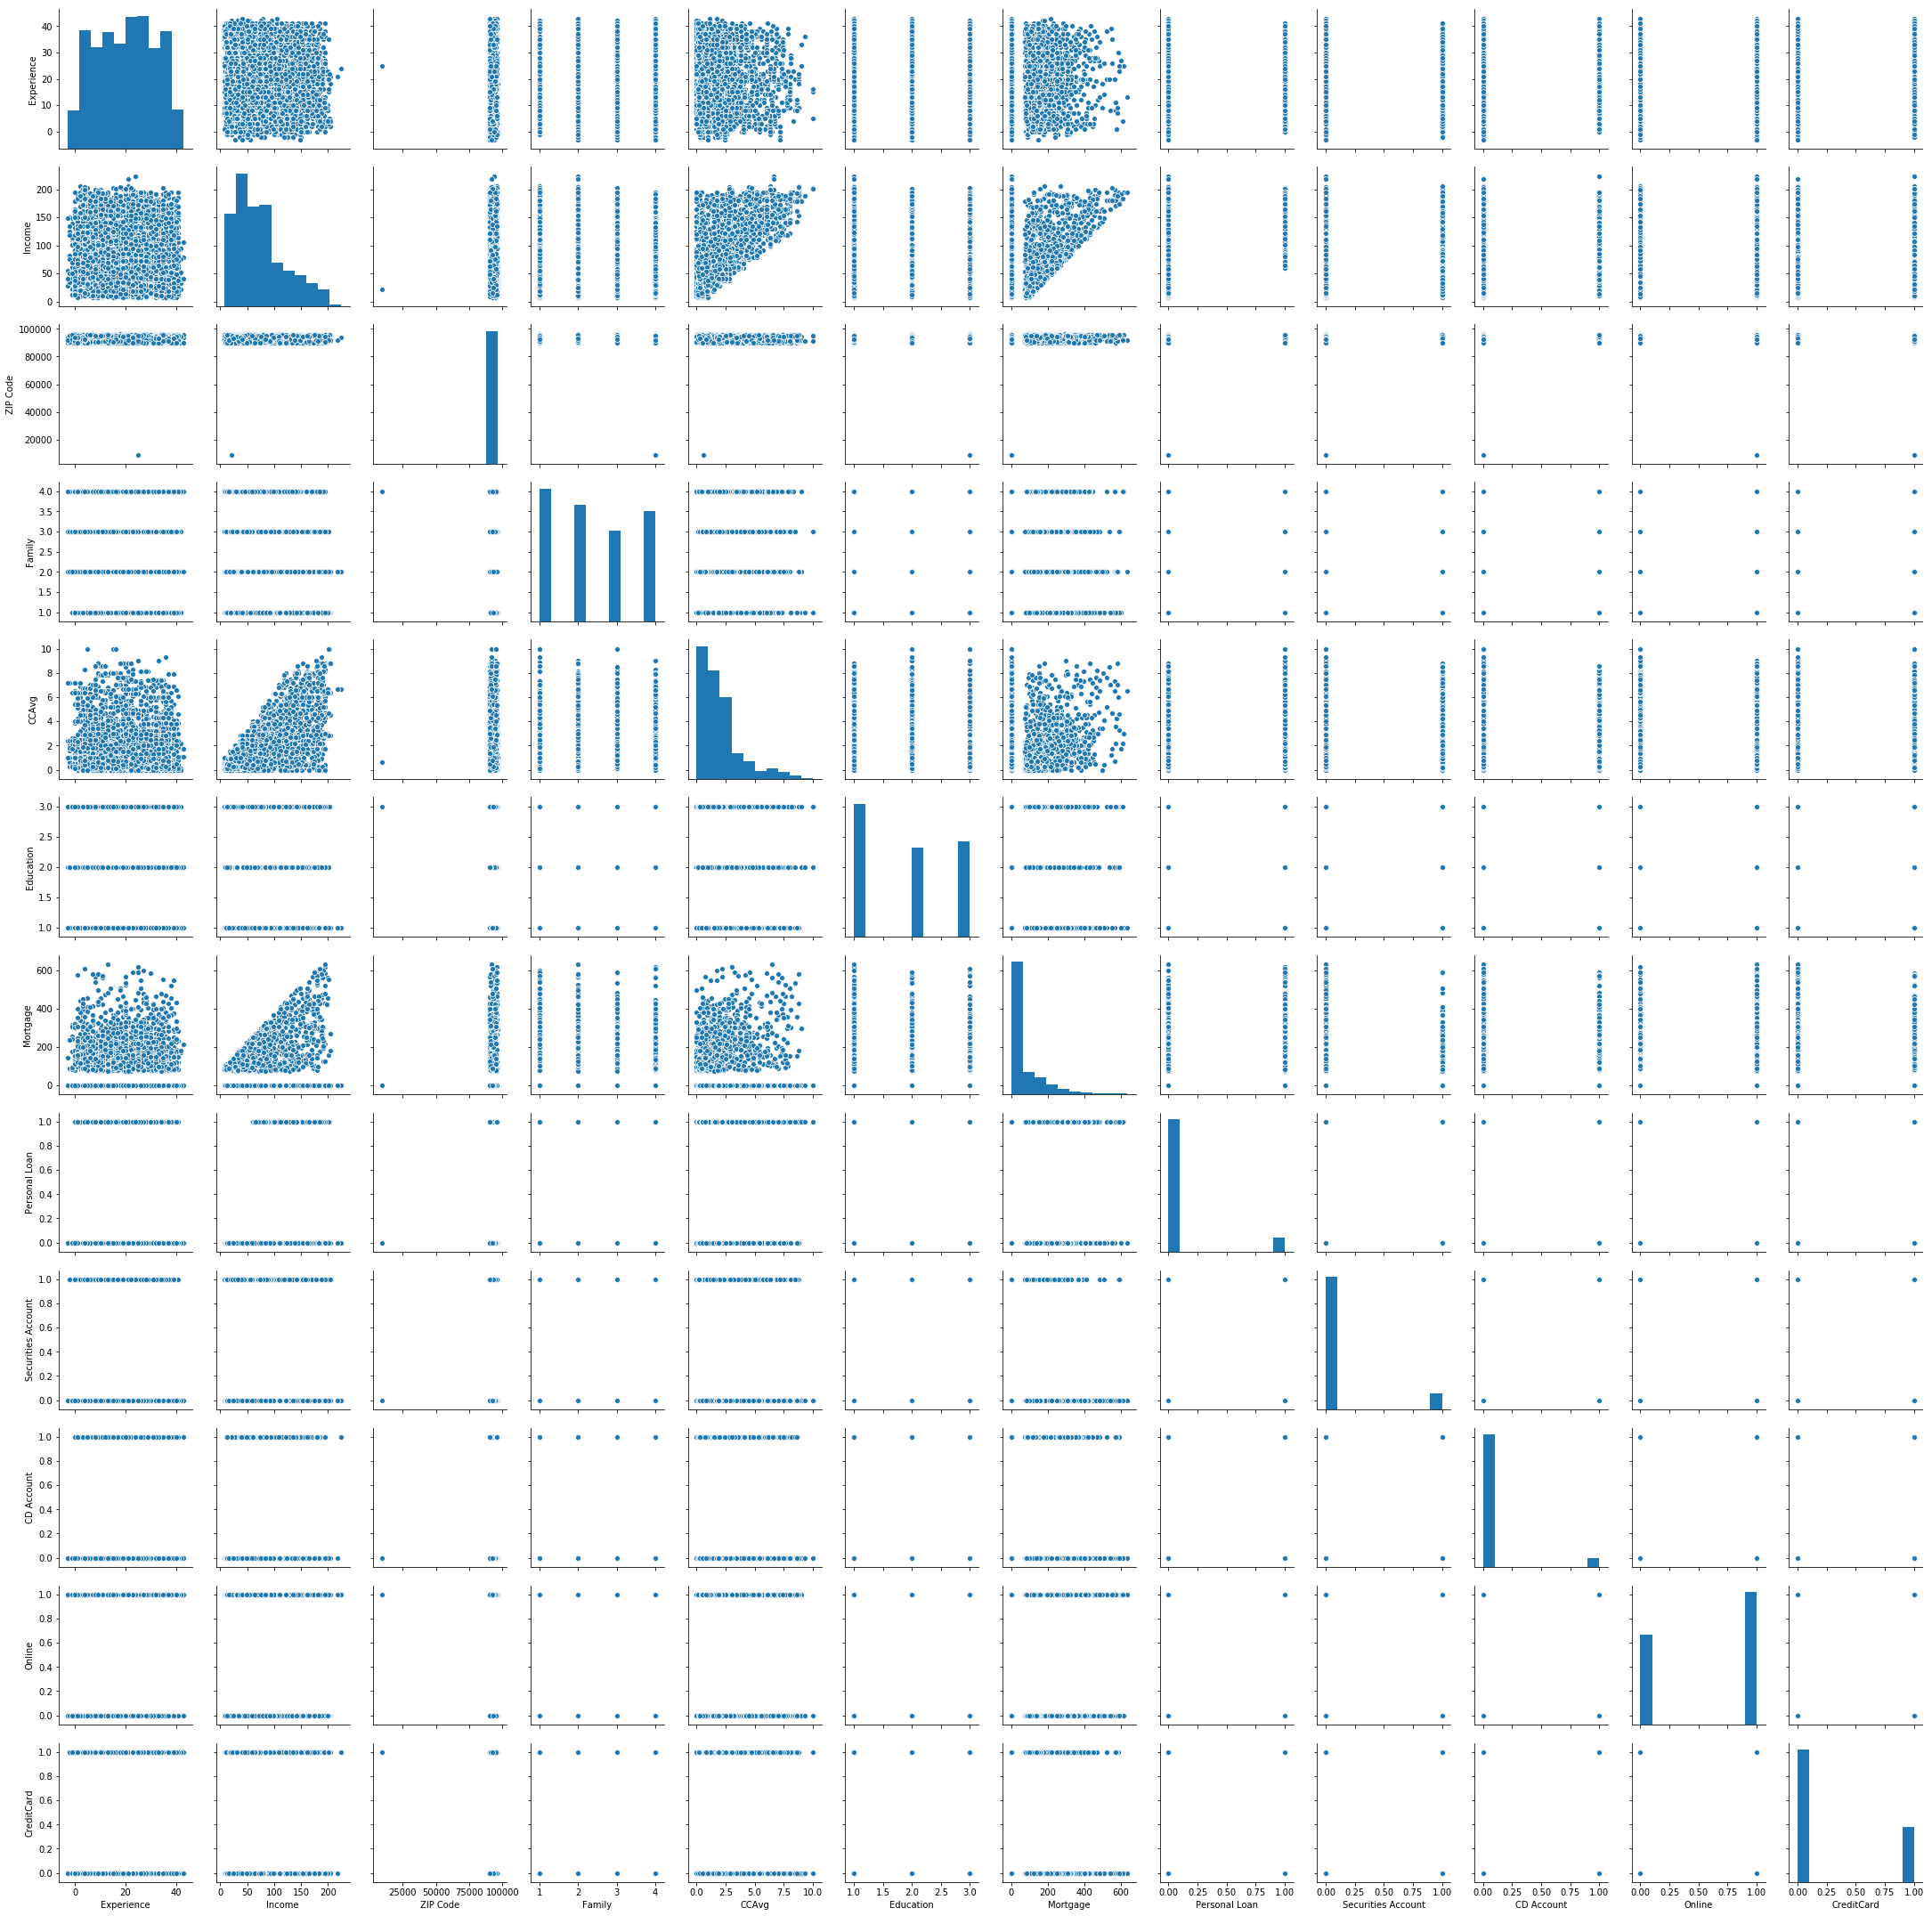

In [9]:
sns.pairplot(cust_data_df.iloc[:,1:])

**Inference:** 

- Age variable is normally distributed, since the mean and median are almost the same with a majority of values falling in range of 30-60
- Experience variable is also normally distributed with majority values falling in 10-30 range. Looks like 'Experience' column contains negative value. Since experience cannot be negative, we need to treat it. 
- Income variable is positively skewed, since the mean is greater than the median and majority of customers have income in range 45K - 60K
- CCAvg is also positively skewed with average with a majority who spend values less than 2.5k 
- Mortage 50% of the individuals have no mortage. However the max value of Mortgage is 635K


#### Check for negative values as being said by describe()

In [10]:
cust_data_df['Experience'].lt(0).sum()

52

In [11]:
print('\033[1mMean of Experience column :-\033[0m', int(stats.mean(cust_data_df['Experience'])))
print('\033[1mMedian of Experience column :-\033[0m', int(stats.median(cust_data_df['Experience'])))
print('\033[1mMode of Experience column :-\033[0m', stats.mode(cust_data_df['Experience']))

Mean of Experience column :- 20
Median of Experience column :- 20
Mode of Experience column :- 32


**Inference:** 

- There are 52 negative values in 'Experience' column which needs to be treated.
- We will treat the negative values with using the absolute value of whatever was in the Experience value rather than replacing with median or mode. 
- Mean and median is 20 and mode is 32, which might end up boosting the data in 'Experience' column. Hence so we will use 'absolute' value for replacement

#### Treat negative values in Experience column using abs():

In [12]:
cust_data_df['Experience'] = cust_data_df['Experience'].abs()

#### Check for negative values once again:

In [13]:
cust_data_df['Experience'].lt(0).sum()

0

**Inference:** 

    Negative values are treated. We are good to proceed now

#### Let's look at the correlation between the variables:

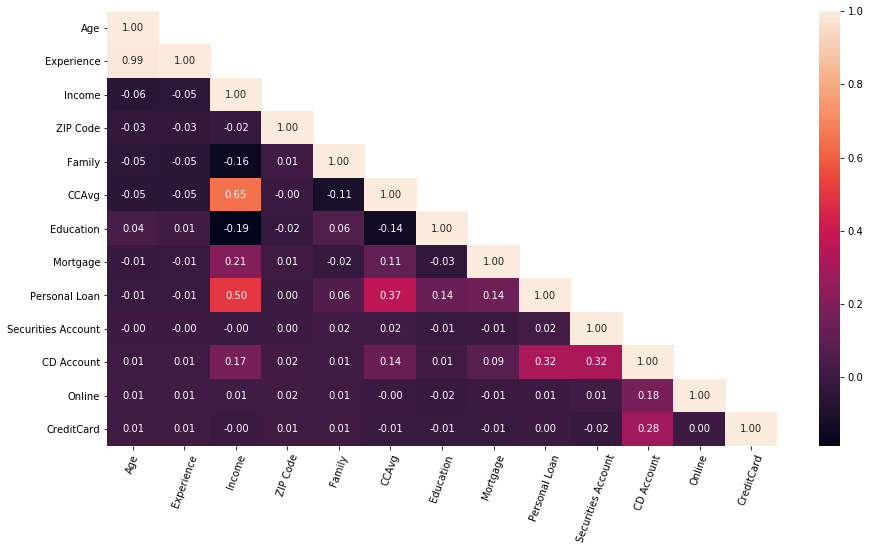

In [14]:
plt.figure(figsize=(15,8))
mask = np.zeros_like(cust_data_df.corr())
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(cust_data_df.corr(), mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=70)

As per the correlation & pair plots, 

- Age and experience has a strong positive correlation <br><br>
- Income and average spending on credit card per month have a postive correlation, moderately correlated
- Personal Loan and Income are moderately correlated
- Personal Loan and average spending on credit card per month have a positive correlation, moderately correlated
- CD account and Personal Loan have a positive correlation to some extent
- CD account and Securities account have a positive correlation to some extent <br><br>

#### Let's visualize this correlation now:

***Age Vs Experience:***

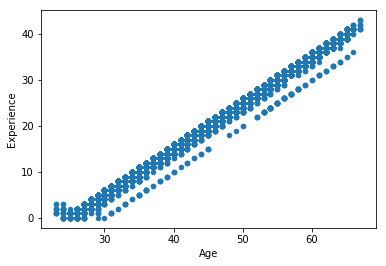

In [15]:
cust_data_df.plot.scatter('Age', 'Experience')

**Inference:**
    
    As already seen, Age and Experience have a strong positive correlation

***Income Vs CCAvg:***

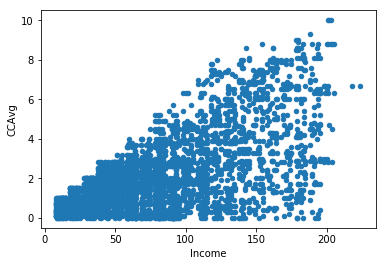

In [16]:
cust_data_df.plot.scatter('Income','CCAvg')

**Inference:**
    
    As already seen, Income and average spending on credit card per month are moderately correlated

### 3. Get the target column distribution. Your comments

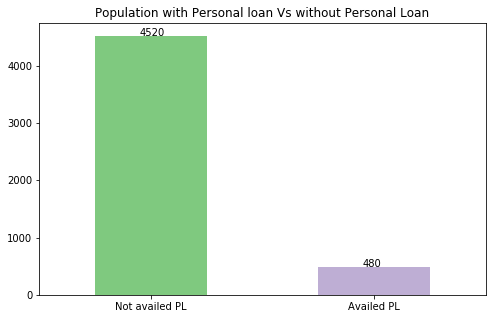

In [17]:
plt.subplots(figsize=(8,5)) 

PL = ['Not availed PL','Availed PL']
xlabels = [i for i in PL]

ax = cust_data_df['Personal Loan'].value_counts().plot.bar(color=sns.color_palette('Accent',20))
ax.set_title('Population with Personal loan Vs without Personal Loan')
ax.set_xticklabels(xlabels, rotation=0)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+.2,p.get_height()+1.8))

**Inference:** 

    -  As seen earlier, majority of people have not availed personal loan that was offered in the last campaign
    -  From the above plot it can be seen that the data is having a huge bias towards the category of people not availing            the personal loan.
    -  Hence our model might tend to perform better towards predicting which customers won't accept the personal loan.

#### Correlation between independent variables and target variable

In [18]:
cust_data_df.corr().loc['Personal Loan']

Age                  -0.007726
Experience           -0.008304
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

**Inference:**
   
       Income, CCAvg and CD Account have positive correlations with the target - Personal Loan. These would be the important                features in predicting the target variable

#### Let's check for the influence of Income and Education on Personal loan

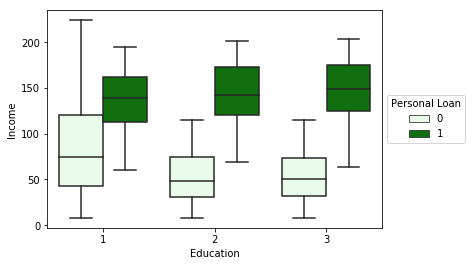

In [19]:
ax = sns.boxplot(x='Education', y='Income', hue='Personal Loan', data=cust_data_df, color='green')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Personal Loan')

**Inference:** 
    
    Income is high for people who are Undergraduates. However people who have availed personal loan have almost the same        income levels, among which highly educated people are a bit ahead in income.

#### Let's check for the influence of Income and Family on Personal loan

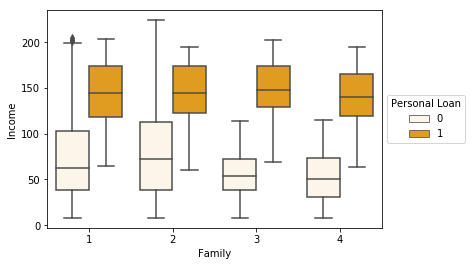

In [20]:
ax = sns.boxplot(x='Family', y='Income', hue='Personal Loan', data=cust_data_df, color='Orange')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Personal Loan')

**Inference:** 
    
    Income is high for people who doesn't have personal loan and whose family size is 2. However people who have availed         personal loan have almost the same income levels

#### Influence of Credit card and CCAverage on Personal Loan:

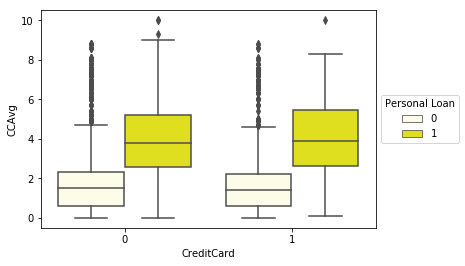

In [21]:
ax = sns.boxplot(x='CreditCard', y='CCAvg', hue='Personal Loan', data=cust_data_df, color='Yellow')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Personal Loan')

**Inference:** 

    Average spending on credits card per month is more or less the same for customers who have availed personal loan or not. However the upper spending limit is high for customers with personal loan. Also whether customers have Universal Bank      issued credit cards or not, do not impact the average spending on credit cards per month.

#### Influence of Education and Mortgage on Personal Loan

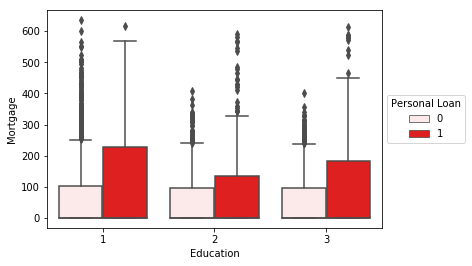

In [22]:
ax = sns.boxplot(x='Education', y='Mortgage', hue='Personal Loan', data=cust_data_df, color='Red')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Personal Loan')

**Inference:** 

    People with high value of mortgage have availed Personal Loans. People with high mortgage value are the undergraduates!

### 4. Split the data into training and test set in the ratio of 70:30 respectively

#### Create the independent (X) & dependent datasets (y)

In [23]:
X = cust_data_df.drop(columns=(['Personal Loan']), axis=1)
y = cust_data_df['Personal Loan']

#### Feature Scaling using MinMaxScaler:

Since the scales of independent variables are different, (we have income, mortgage and CCAverage in dollars, Experience and Age in years) it might affect the model. So we can use MinMaxScaler to normalize the data

In [24]:
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

In [25]:
## After Scaling:

In [26]:
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.023256,0.189815,0.936527,1.000000,0.16,0.0,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.441860,0.120370,0.924872,0.666667,0.15,0.0,0.0,1.0,0.0,0.0,0.0
2,0.363636,0.348837,0.013889,0.977892,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.209302,0.425926,0.970931,0.000000,0.27,0.5,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.186047,0.171296,0.939080,1.000000,0.10,0.5,0.0,0.0,0.0,0.0,1.0


In [27]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,0.507691,0.260526,0.0,0.272727,0.500000,0.727273,1.0
Experience,5000.0,0.468247,0.265470,0.0,0.232558,0.465116,0.697674,1.0
Income,5000.0,0.304510,0.213119,0.0,0.143519,0.259259,0.416667,1.0
ZIP Code,5000.0,0.959946,0.024293,0.0,0.945732,0.963203,0.976610,1.0
Family,5000.0,0.465467,0.382554,0.0,0.000000,0.333333,0.666667,1.0
CCAvg,5000.0,0.193794,0.174766,0.0,0.070000,0.150000,0.250000,1.0
Education,5000.0,0.440500,0.419935,0.0,0.000000,0.500000,1.000000,1.0
Mortgage,5000.0,0.088974,0.160179,0.0,0.000000,0.000000,0.159055,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.000000,0.000000,0.000000,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.000000,0.000000,0.000000,1.0


#### Split train & test datasets: Same will be used for all the models

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

### 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

### 1. K Nearest Neighbors (KNN):

#### Build the model with the default value of k (which is 5)

In [29]:
# KNN model
KNN = KNeighborsClassifier()

# Train the model
KNN.fit(X_train, y_train)

# Test the model
y_pred = KNN.predict(X_test)

#### Calculate the train performance of the model with a default k value of 5:

In [30]:
# Get the test accuracy score

print('\n\033[1mKNN Training performance Accuracy:\033[0m %3.3f' %(KNN.score(X_train, y_train)))


KNN Training performance Accuracy: 0.965


#### Calculate the test performance of the model with a default k value of 5:

In [31]:
# Get the test accuracy score

print('\n\033[1mKNN Test performance Accuracy:\033[0m %3.3f' %(metrics.accuracy_score(y_pred, y_test)))


KNN Test performance Accuracy: 0.961


#### Find the best value of K:

In [32]:
# Find the maximum value of K:

maxK = int(np.sqrt(X_train.shape[0]))
optimalTrainAccuracy = 0

In [33]:
KNN_score_df = pd.DataFrame(columns=('kval','score'))
for k_i in range(maxK):
    if(((k_i % 2) != 0) & (k_i > 1)):
        KNN = KNeighborsClassifier(n_neighbors=k_i)
        KNN.fit(X_train, y_train)
        KNN_score = KNN.score(X_train, y_train)
        KNN_score_df = KNN_score_df.append({'kval': k_i, 'score': KNN_score}, ignore_index=True)
        if(KNN_score > optimalTrainAccuracy):
            optimalK = k_i
            optimalTrainAccuracy = KNN_score

print('\n\033[1mOptimum value of K: \033[0m',optimalK)
print('\n\033[1mOptimal Train Accuracy: \033[0m',optimalTrainAccuracy,'\n')


Optimum value of K:  3

Optimal Train Accuracy:  0.9754285714285714 



#### Graphical representation - Accuracy score Vs K-value

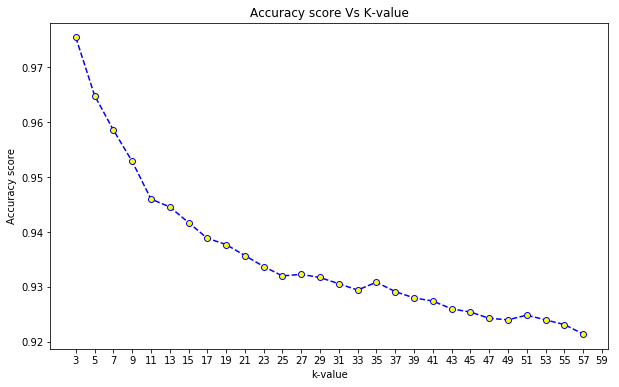

In [34]:
plt.subplots(figsize=(10,6))
plt.plot(KNN_score_df['kval'], KNN_score_df['score'],color='blue',linestyle='dashed',marker='o',markerfacecolor = 'yellow')
plt.xlabel('k-value')
plt.ylabel('Accuracy score')
plt.title('Accuracy score Vs K-value')
# plt.yticks(np.arange(0.8, 1, 0.02))
plt.xticks(np.arange(3, 60, 2))
plt.show()

It is evident that optimum value of k is 3 with an accuracy of 0.975

#### Train and test the model with the best found K value of 3

In [35]:
## Train and test the model with the best found K value of 3
KNN = KNeighborsClassifier(n_neighbors=3)

## Train the model
KNN.fit(X_train, y_train)

## Test the model
y_pred = KNN.predict(X_test)

## Training Performance score
print('\n\033[1mTraining Performance score with k value as 3: \033[0m %3.3f' %(KNN.score(X_train, y_train)))

## Test Performance score
print('\n\033[1mTest Performance score with k value as 3: \033[0m %3.3f' %(metrics.accuracy_score(y_pred, y_test)),'\n')


Training Performance score with k value as 3:  0.975

Test Performance score with k value as 3:  0.966 



#### Classification report

In [36]:
target_names = ['Not availing PL', 'Availing PL']
clrpt_knn = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(clrpt_knn)

                 precision    recall  f1-score   support

Not availing PL       0.97      0.99      0.98      1362
    Availing PL       0.91      0.70      0.79       138

      micro avg       0.97      0.97      0.97      1500
      macro avg       0.94      0.84      0.89      1500
   weighted avg       0.96      0.97      0.96      1500



#### Build the confusion matrix:

In [37]:
cm_knn = metrics.confusion_matrix(y_test, y_pred)
print('\033[1mConfusion matrix :-\033[0m')
cm_knn

Confusion matrix :-


array([[1353,    9],
       [  42,   96]], dtype=int64)

#### Plotting the confusion matrix for better understanding:

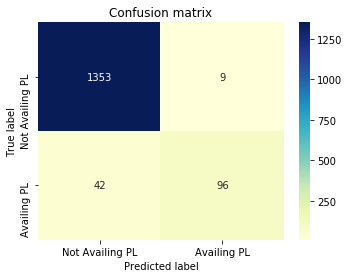

In [38]:
cm_knn = pd.DataFrame(cm_knn,
                  index = ['Not Availing PL','Availing PL'], 
                  columns = ['Not Availing PL','Availing PL'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_knn, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Analyzing the confusion matrix

True Positives (TP): we correctly predicted that 1353 liability customers will not buy personal loan

True Negatives (TN): we correctly predicted that 96 liability customers will buy personal loan

False Positives (FP): we incorrectly predicted that 42 liability customers will not buy personal loan (a "Type I error")
Falsely predicted positive Type I error

False Negatives (FN): we incorrectly predicted that 9 liability customers will buy personal loan (a "Type II error") 
Falsely predicted negative Type II error

### <font color=blue>Overall Inference with K Nearest Neighbors </font>

**KNN model building:**

- Data set was split into 70% training and 30% test.
- Initial training accuracy for default value of k (=5) is 0.965
- Initial test accuracy for default value of k (=5) is 0.961 <br><br>

- Found the maximum possible value of K using square root of train data
- Optimal value of K was found to be 3 <br><br>

- Train accuracy with the best found value of k (=3) is 0.975
- Test accuracy with the best found value of k (=3) is 0.966 <br><br>

- Confusion matrix was built and inference was given about the same

### 2. Logistic Regression:

#### Unoptimized way of building the logistic regression model:

In [39]:
## Build Logistic Regression model:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Calculate accuracy, recall, precision, F1 Score of train data with a default threshold of 0.5:

In [40]:
train_prediction = np.where(logreg.predict_proba(X_train)[:,1] > 0.5, 1, 0)
train_accuracy = accuracy_score(y_train, train_prediction).round(2)
train_recall = recall_score(y_train, train_prediction).round(2)
train_precision = precision_score(y_train, train_prediction).round(2)
train_F1score = f1_score(y_train, train_prediction).round(2)
train_results = [X_train.shape[0], 0.5, train_accuracy, train_recall, train_precision, train_F1score]
train_results

[3500, 0.5, 0.95, 0.57, 0.87, 0.69]

#### Calculate accuracy, recall, precision, F1 Score of test data with a default threshold of 0.5:

In [41]:
test_prediction = np.where(logreg.predict_proba(X_test)[:,1] > 0.5, 1, 0)
test_accuracy = accuracy_score(y_test, test_prediction).round(2)
test_recall = recall_score(y_test, test_prediction).round(2)
test_precision = precision_score(y_test, test_prediction).round(2)
test_F1score = f1_score(y_test, test_prediction).round(2)
test_results = [X_test.shape[0], 0.5, test_accuracy, test_recall, test_precision, test_F1score]
test_results

[1500, 0.5, 0.95, 0.58, 0.88, 0.7]

#### ROC - AUC

In [42]:
y_predictprob = logreg.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_predictprob[::,1])

roc_auc = auc(fpr, tpr)
print('\033[1mArea under the ROC curve:\033[0m %3.2f' %(roc_auc)) 

Area under the ROC curve: 0.96


#### Plotting ROC curve:

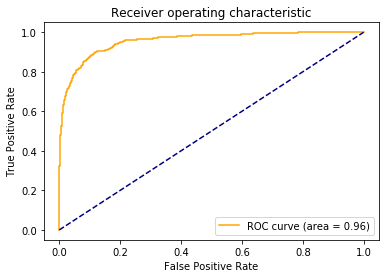

In [43]:
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

#### Finding the Optimal Threshold value:

In [44]:
optimalF1 = 0
optimalTh = 0

for th in thresholds:
    prediction = np.where(logreg.predict_proba(X_train)[:,1] > th, 1, 0)
    f1Score = f1_score(y_train, prediction)
    if(optimalF1 < f1Score):
        optimalF1 = f1Score
        optimalTh = th

#### Calculate accuracy, recall, precision, F1 Score of train data once again with the optimum threshold value:

In [45]:
train_prediction = np.where(logreg.predict_proba(X_train)[:,1] > optimalTh, 1, 0)
train_accuracy = accuracy_score(y_train, train_prediction).round(2)
train_recall = recall_score(y_train, train_prediction).round(2)
train_precision = precision_score(y_train, train_prediction).round(2)
train_F1score = f1_score(y_train, train_prediction).round(2)
optimal_train_results = [X_train.shape[0], optimalTh.round(2), train_accuracy, train_recall, train_precision, train_F1score]
optimal_train_results

[3500, 0.36, 0.95, 0.68, 0.78, 0.73]

#### Calculate accuracy, recall, precision, F1 Score of test data once again with the optimum threshold value:

In [46]:
test_prediction = np.where(logreg.predict_proba(X_test)[:,1] > optimalTh, 1, 0)
test_accuracy = accuracy_score(y_test, test_prediction).round(2)
test_recall = recall_score(y_test, test_prediction).round(2)
test_precision = precision_score(y_test, test_prediction).round(2)
test_F1score = f1_score(y_test, test_prediction).round(2)
optimal_test_results = [X_test.shape[0], optimalTh.round(2), test_accuracy, test_recall, test_precision, test_F1score]
optimal_test_results

[1500, 0.36, 0.95, 0.67, 0.75, 0.71]

#### Concatenate Train and Test results to resultsDf

In [47]:
resultsDf = pd.DataFrame( index=["dataSize", "optimalTh", "accuracy", "recall", "precision", "f1_score"])
resultsDf['defualtTrainResults'] = train_results
resultsDf['defaultTestResults'] = test_results
resultsDf['optimalTrainResults'] = optimal_train_results
resultsDf['optimalTestResults'] = optimal_test_results

resultsDf.round(2)

,defualtTrainResults,defaultTestResults,optimalTrainResults,optimalTestResults
dataSize,3500.00,1500.00,3500.00,1500.00
optimalTh,0.50,0.50,0.36,0.36
accuracy,0.95,0.95,0.95,0.95
recall,0.57,0.58,0.68,0.67
precision,0.87,0.88,0.78,0.75
f1_score,0.69,0.70,0.73,0.71


#### Classification matrix:

In [48]:
target_names = ['Not availing PL', 'Availing PL']
clrpt_logreg = metrics.classification_report(y_test, test_prediction, target_names=target_names)
print(clrpt_logreg)

                 precision    recall  f1-score   support

Not availing PL       0.97      0.98      0.97      1362
    Availing PL       0.75      0.67      0.71       138

      micro avg       0.95      0.95      0.95      1500
      macro avg       0.86      0.83      0.84      1500
   weighted avg       0.95      0.95      0.95      1500



#### Confusion matrix:

In [49]:
y_pred = np.where(logreg.predict_proba(X_test)[:,1] > optimalTh, 1, 0)
cm_logreg = metrics.confusion_matrix(y_test, y_pred)
print('\033[1mConfusion matrix :-\033[0m')
cm_logreg

Confusion matrix :-


array([[1331,   31],
       [  45,   93]], dtype=int64)

#### Plotting Confusion matrix:

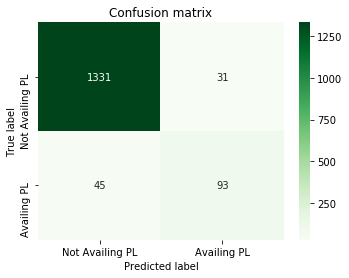

In [50]:
cm_logreg = pd.DataFrame(cm_logreg,
                  index = ['Not Availing PL','Availing PL'], 
                  columns = ['Not Availing PL','Availing PL'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_logreg, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Analyzing the confusion matrix

True Positives (TP): we correctly predicted that 1331 liability customers will not buy personal loan

True Negatives (TN): we correctly predicted that 93 liability customers will buy personal loan

False Positives (FP): we incorrectly predicted that 45 liability customers will not buy personal loan (a "Type I error")
Falsely predicted positive Type I error

False Negatives (FN): we incorrectly predicted that 31 liability customers will buy personal loan (a "Type II error") 
Falsely predicted negative Type II error

### <font color=blue>Overall Inference with Logistic Regression </font>

**Logistic Regression model building:**

-  Data set was split into 70% training and 30% test.
-  Initially threshold value was not optimized and a default value of 0.5 was used while prediction
-  Threshold of 0.5 gave a training accuracy of 0.95, recall score of 0.57, precision score of 0.87 & F1 score of 0.69
-  Threshold of 0.5 gave a test accuracy of 0.95, recall score of 0.58, precision score of 0.88 & F1 score of 0.70
-  AUC - ROC was found to be 0.96<br><br>

-  Later optimum threshold was found to be 0.36
-  Optimal Threshold of 0.36 gave a training accuracy of 0.95, recall score of 0.68, precision score of 0.78 & F1 score of 0.73
-  Optimal Threshold of 0.36 gave a test accuracy of 0.95, recall score of 0.67, precision score of 0.75 & F1 score of 0.71
-  Confusion matrix was built and inference was given for the matrix


### 3. Naive Bayes:

In [51]:
# Build Naive Bayes model:

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Predict output for X_test

In [52]:
y_pred = nb.predict(X_test)

#### Train accuracy:

In [53]:
print('\033[1mTraining Accuracy:\033[0m %3.3f' %(nb.score(X_train, y_train)))

Training Accuracy: 0.882


#### Test Accuracy:

In [54]:
print('\033[1mTest Accuracy:\033[0m %3.3f' %(metrics.accuracy_score(y_pred, y_test)))

Test Accuracy: 0.878


#### Precision, recall, f1 scores are calculated independently for different classes:

In [55]:
target_names = ['Not Availing PL', 'Availing PL']
clrpt_nb = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(clrpt_nb)

                 precision    recall  f1-score   support

Not Availing PL       0.96      0.91      0.93      1362
    Availing PL       0.39      0.59      0.47       138

      micro avg       0.88      0.88      0.88      1500
      macro avg       0.67      0.75      0.70      1500
   weighted avg       0.90      0.88      0.89      1500



#### Confusion matrix:

In [56]:
## Confusion matrix:

cm_nb = metrics.confusion_matrix(y_test, y_pred)
print('\033[1mConfusion matrix :-\033[0m')
cm_nb

Confusion matrix :-


array([[1236,  126],
       [  57,   81]], dtype=int64)

#### Plotting Confusion matrix:

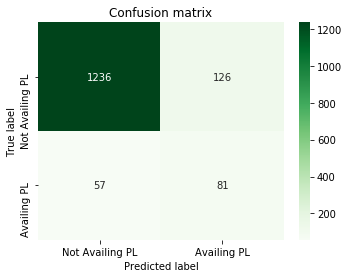

In [57]:
cm_nb = pd.DataFrame(cm_nb,
                  index = ['Not Availing PL','Availing PL'], 
                  columns = ['Not Availing PL','Availing PL'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_nb, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Analyzing the confusion matrix

True Positives (TP): we correctly predicted that 1236 liability customers will not buy personal loan

True Negatives (TN): we correctly predicted that 81 liability customers will buy personal loan

False Positives (FP): we incorrectly predicted that 57 liability customers will not buy personal loan (a "Type I error")
Falsely predicted positive Type I error

False Negatives (FN): we incorrectly predicted that 126 liability customers will buy personal loan (a "Type II error") 
Falsely predicted negative Type II error

### <font color=blue>Overall Inference with Naive Bayes </font>

**Naive Bayes model building:**

- Data set was split into 70% training and 30% test <br><br>

- Train accuracy is 0.882
- Test accuracy is 0.878 <br><br>

- Confusion matrix was built and inference was given about the same

## 6. Print the confusion matrix for all the above models (5 points)

#### Confusion matrix comparison for all the 3 models:

Text(0.5, 360.61846590909096, 'Predicted label')

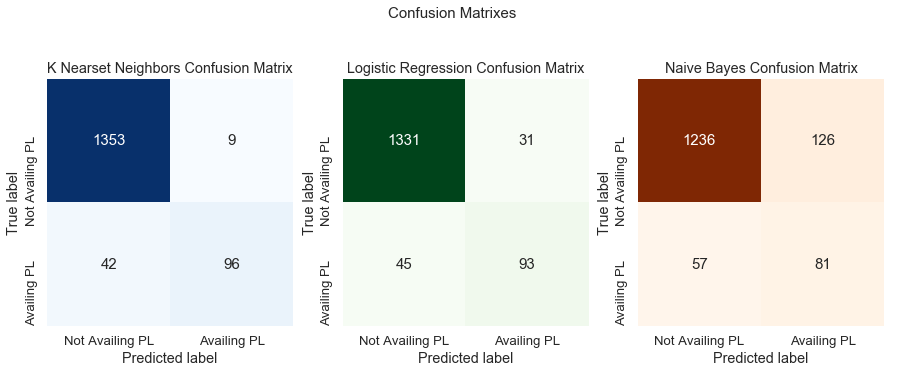

In [68]:
##printing the confusion matrix of the three models with scaled data
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)

plt.suptitle("Confusion Matrixes", fontsize=15)

plt.subplot(2,3,1)
sns.heatmap(cm_knn, cbar=False, annot=True, annot_kws={"fontsize":15}, cmap="Blues", fmt="d")
plt.title("K Nearset Neighbors Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2,3,2)
sns.heatmap(cm_logreg, cbar=False, annot=True, annot_kws={"fontsize":15}, cmap="Greens", fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(2,3,3)
sns.heatmap(cm_nb, cbar=False, annot=True, annot_kws={"fontsize":15}, cmap="Oranges", fmt="d")
plt.title("Naive Bayes Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')

**Inference:**

- From the confusion matrices, it is evident that KNN has predicted the True positives and True Negatives better when compared tp Logistic Regression and Naive Bayes models
- Also, KNN has lesser type I and type II errors compared to the other 2 models

#### Accuracy comparison for all the 3 models:

In [59]:
accuracy_df = pd.DataFrame(columns=['Train Accuracy', 'Test Accuracy'], index=['KNN', 'Logistic Regression', 'Naive Bayes'])

accuracy_df.iloc[0,0] = KNN.score(X_train, y_train).round(3)
accuracy_df.iloc[0,1] = KNN.score(X_test, y_test).round(3)

accuracy_df.iloc[1,0] = logreg.score(X_train, y_train).round(3)
accuracy_df.iloc[1,1] = logreg.score(X_test, y_test).round(3)

accuracy_df.iloc[2,0] = nb.score(X_train, y_train).round(3)
accuracy_df.iloc[2,1] = nb.score(X_test, y_test).round(3)

accuracy_df.index.name = 'Models'

accuracy_df

,Train Accuracy,Test Accuracy
Models,,
KNN,0.975,0.966
Logistic Regression,0.949,0.954
Naive Bayes,0.882,0.878


**Inference:**

    Train and Test accuracy is more for KNN than the other 2 models

## 7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

#### Model Comparison - Using KFold

KNN: 0.959600 (0.005783)
LOG REG: 0.950200 (0.005325)
NB: 0.882000 (0.010807)


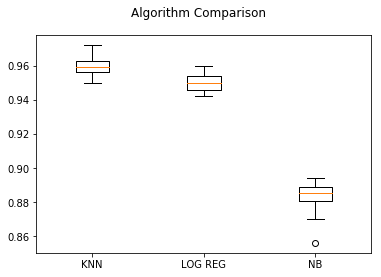

In [60]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LOG REG', LogisticRegression()))
models.append(('NB', GaussianNB()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


**Inference:**
    
    From the above algorithm comparison, it is evident that KNN performs better compared to Logistic Regression and Naive           Bayes in predicting whether customers would avail personal loan or not

## <font color=blue>Final inference on model performances</font>

**KNN has performed better in predicting whether customers of Thera bank will avail Personal Loans or not**

**Why KNN?**

Compared to the other 2 models, Logistic Regression and Naive Bayes, from the above analysis we can see that:

- k-Nearest neighbors algorithm has given a better accuracy of 96.6%. 
- It has also given the least Type 1 (False Positive) and Type 2 (False Negative) errors.
- It also has a better f1 score of 0.98 for Class - 'Not availing Personal Loan' and 0.79 for Class - 'Availing Personal Loan' 

Neverthless, **Logistic regression model** has also performed equally well in terms of accuracy, but it has more type I and type II errors compared to KNN with a F1 score of 0.97 for Class - 'Not availing Personal Loan' and 0.71 for Class - 'Availing Personal Loan'.

**Naive Bayes** has a low accuracy compared to KNN and it also has more Type I and Type II errors with a F1 score of 0.93 for Class - 'Not availing Personal Loan' and 0.47 for Class - 'Availing Personal Loan'.

**For the given case : To build a model that will help Thera Bank to identify the potential customers who have higher probability of purchasing the loan, KNN is the best model among the three based on the accuracy score and the confusion matrix**

### <center> End of Supervised Learning_R3_Project2_Thera Bank </center>